In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ASUS\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load the datasets 
purchase_df = pd.read_csv(r"P:\Git_Files\iGnosis_Tech_assignment\Datas\purchase_behaviour.csv")
transaction_df = pd.read_csv(r"P:\Git_Files\iGnosis_Tech_assignment\Datas\transaction_data.csv")

In [3]:
# Display basic info 
print("Purchase Data Info:")
print(purchase_df.info())
print("\nTransaction Data Info:")
print(transaction_df.info())

Purchase Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None

Transaction Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  f

In [4]:
# Check for missing values
print("Missing values in Purchase Data:")
print(purchase_df.isnull().sum())
print("\nMissing values in Transaction Data:")
print(transaction_df.isnull().sum())

Missing values in Purchase Data:
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Missing values in Transaction Data:
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [5]:
# Convert date column to datetime format
transaction_df['DATE'] = pd.to_datetime(transaction_df['DATE'])

In [6]:
# Sort transaction data by product number
transaction_df = transaction_df.sort_values(by='PROD_NBR').reset_index(drop=True)

In [8]:
# Display the sorted data by product number
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1970-01-01 00:00:00.000043345,22,22460,18702,1,Smiths Crinkle Cut Chips Barbecue 170g,2,5.8
1,1970-01-01 00:00:00.000043538,53,53060,47316,1,Smiths Crinkle Cut Chips Barbecue 170g,2,5.8
2,1970-01-01 00:00:00.000043305,69,69166,66913,1,Smiths Crinkle Cut Chips Barbecue 170g,2,5.8
3,1970-01-01 00:00:00.000043497,223,223038,223159,1,Smiths Crinkle Cut Chips Barbecue 170g,2,5.8
4,1970-01-01 00:00:00.000043485,230,230222,233470,1,Smiths Crinkle Cut Chips Barbecue 170g,2,5.8


In [9]:
transaction_df.tail()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
264831,1970-01-01 00:00:00.000043411,123,123060,126367,114,Kettle Sensations Siracha Lime 150g,2,9.2
264832,1970-01-01 00:00:00.000043327,17,17314,15086,114,Kettle Sensations Siracha Lime 150g,1,4.6
264833,1970-01-01 00:00:00.000043352,237,237063,240336,114,Kettle Sensations Siracha Lime 150g,2,9.2
264834,1970-01-01 00:00:00.000043381,236,236108,239202,114,Kettle Sensations Siracha Lime 150g,2,9.2
264835,1970-01-01 00:00:00.000043331,201,201102,200375,114,Kettle Sensations Siracha Lime 150g,1,4.6


In [10]:
# Identify top 3 most profitable products based on total sales and number of customers
product_analysis = transaction_df.groupby('PROD_NBR').agg({'TOT_SALES': 'sum', 'LYLTY_CARD_NBR': 'nunique'}).reset_index()
product_analysis = product_analysis.rename(columns={'LYLTY_CARD_NBR': 'Unique_Customers'})
product_analysis['Profitability_Score'] = product_analysis['TOT_SALES'] * product_analysis['Unique_Customers']
top_products = product_analysis.sort_values(by='Profitability_Score', ascending=False).head(3)

In [11]:
# Identify most profitable customers
customer_profit = transaction_df.groupby('LYLTY_CARD_NBR').agg({'TOT_SALES': 'sum', 'TXN_ID': 'count'})
customer_profit = customer_profit.rename(columns={'TOT_SALES': 'Total_Spent', 'TXN_ID': 'Total_Transactions'})
profitable_customers = customer_profit.sort_values(by='Total_Spent', ascending=False).head(10)

In [12]:
# Merge with customer characteristics
profitable_customers = profitable_customers.merge(purchase_df, on='LYLTY_CARD_NBR', how='left')


In [13]:
# Grouping profitable customers by LIFESTAGE and PREMIUM_CUSTOMER
profitable_segments = profitable_customers.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg({'Total_Spent': 'sum', 'Total_Transactions': 'sum'}).reset_index()


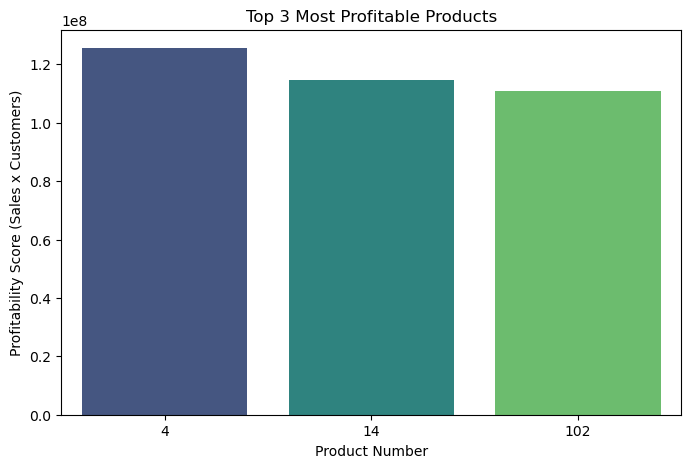

In [14]:
# Visualizing top products
plt.figure(figsize=(8, 5))
sns.barplot(x=top_products['PROD_NBR'], y=top_products['Profitability_Score'], palette='viridis')
plt.title('Top 3 Most Profitable Products')
plt.xlabel('Product Number')
plt.ylabel('Profitability Score (Sales x Customers)')
plt.show()

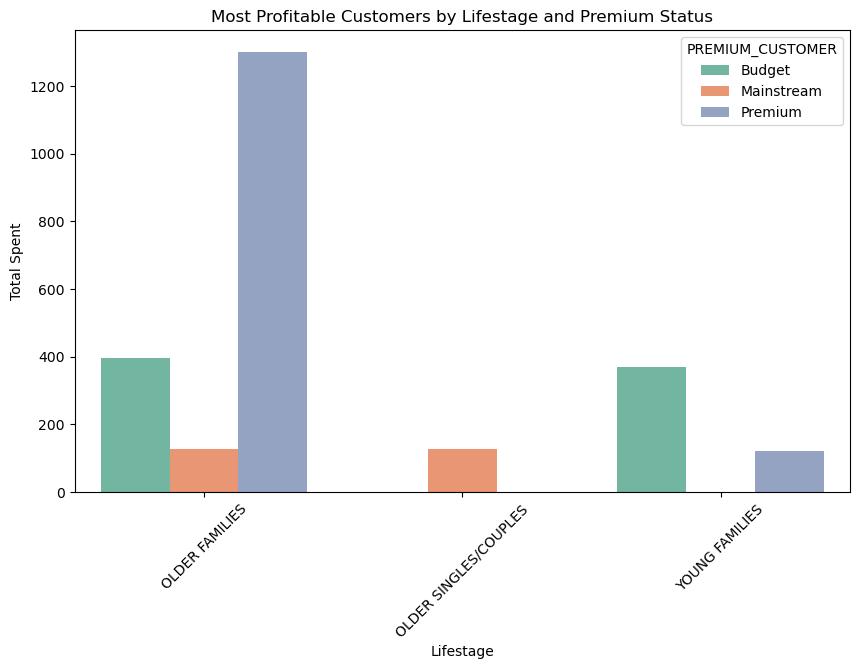

In [15]:
# Visualizing most profitable customer segments
plt.figure(figsize=(10, 6))
sns.barplot(x='LIFESTAGE', y='Total_Spent', hue='PREMIUM_CUSTOMER', data=profitable_segments, palette='Set2')
plt.title('Most Profitable Customers by Lifestage and Premium Status')
plt.xlabel('Lifestage')
plt.ylabel('Total Spent')
plt.xticks(rotation=45)
plt.show()